In [31]:
import torch
import matplotlib.pyplot as plt
import random

构建模型



In [32]:
real_X = torch.normal(0,1,(1000,2))
real_w = torch.tensor([2,-3.4]).reshape(2,1)
real_b = 4.8

real_y = torch.matmul(real_X,real_w) + real_b
real_X.shape, real_y.shape

(torch.Size([1000, 2]), torch.Size([1000, 1]))

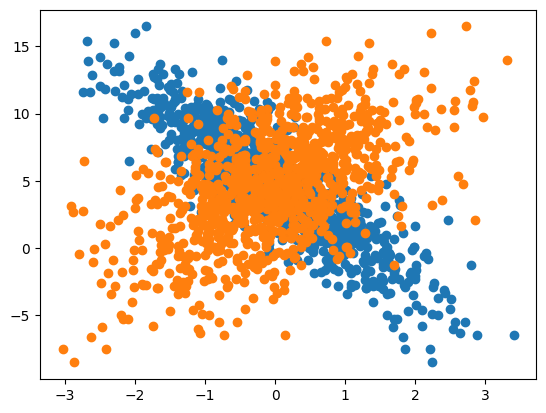

In [33]:
fig, ax = plt.subplots()
ax.scatter(real_X[:,1],real_y)
ax.scatter(real_X[:,0],real_y)


## 训练模型

In [34]:
def data_iter(batch_size: int, features, labels):
    num_features = len(features)
    indices = list(range(num_features))
    random.shuffle(indices)

    for i in range(0,num_features,batch_size):
        batch_indices = torch.tensor(indices[i:min(i+batch_size,num_features)])
        yield features[batch_indices], labels[batch_indices]

In [55]:

def linear_regression(X,w,b):
    return torch.matmul(X,w) + b

def squared_loss(y_hat,y):
    return (y_hat-y) ** 2 / 2

def sgd(params_w, learning_rate, batch_size):
    with torch.no_grad():
        for param in params_w:
            param -= (learning_rate * param.grad / batch_size)
            param.grad.zero_()



In [57]:
w = torch.normal(0,0.01,size=(2,1),requires_grad=True)
b = torch.zeros(1,requires_grad=True)

learning_rate = 0.03
num_rounds = 3
net = linear_regression
loss = squared_loss

batch_size = 10

for round in range(num_rounds):
    for X,y in data_iter(batch_size, real_X,real_y):
        l = loss(net(X,w,b),y)
        l.sum().backward()
        sgd([w,b],learning_rate,batch_size)
    with torch.no_grad():
        training_loss = loss(net(real_X,w,b),real_y)
        print(f'Epoch: {round}, training_loss: {training_loss.mean()}')


Epoch: 0, training_loss: 0.04721158370375633
Epoch: 1, training_loss: 0.00012052330566802993
Epoch: 2, training_loss: 3.1320058724304545e-07


In [60]:
print("w: ",w)
print("b: ",b)

display(real_w - w)
display(real_b - b)

w:  tensor([[ 1.9997],
        [-3.3997]], requires_grad=True)
b:  tensor([4.7993], requires_grad=True)


tensor([[ 0.0003],
        [-0.0003]], grad_fn=<SubBackward0>)

tensor([0.0007], grad_fn=<RsubBackward1>)